# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Read the dataset

In [2]:
data = pd.read_csv("diabetes.csv")

# Data preprocessing and exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.isnull().values.any()

False

In [8]:
corrmat = data.corr()

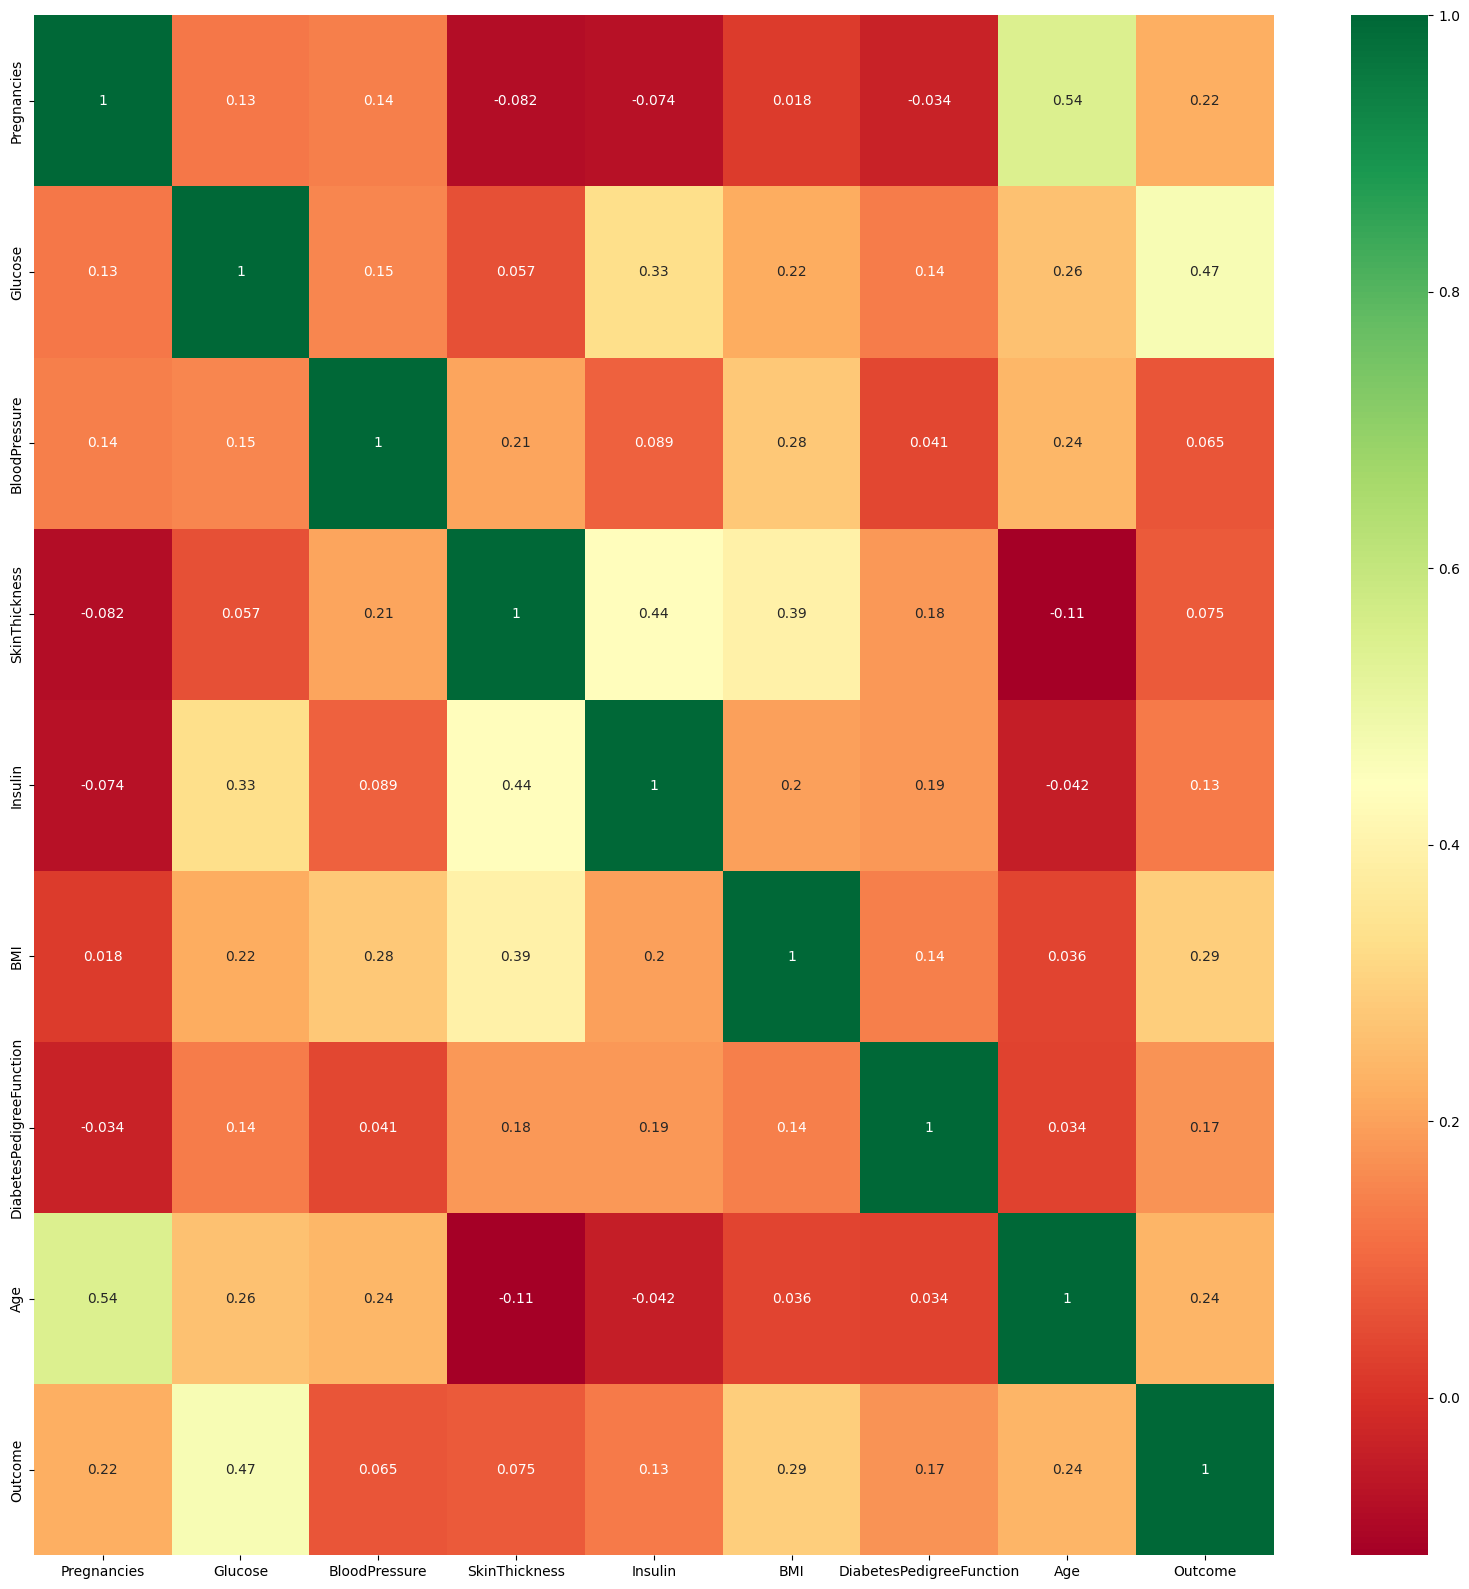

In [9]:
plt.figure(figsize=(20,20))
g = sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

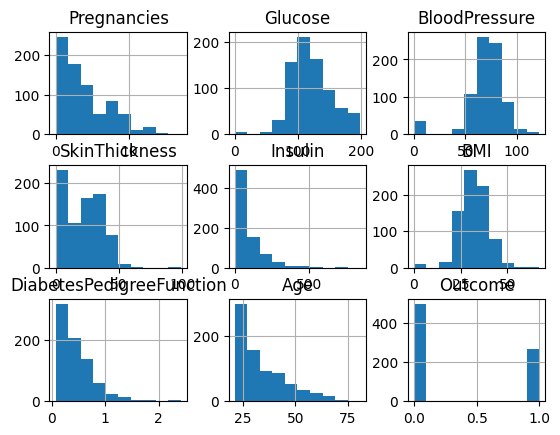

In [10]:
data.hist()

# Split the data into features and target

In [11]:
feature_columns = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']
x = data[feature_columns].values
y = data[predicted_class].values

# Apply SMOTE to handle class imbalance

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smote = SMOTE(random_state=10)
x_smote, y_smote = smote.fit_resample(x, y)

# Train-test split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=10)

# Handle missing values

In [15]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy='mean')
x_train = fill_values.fit_transform(x_train)
x_test = fill_values.transform(x_test)

# Model training and evaluation

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Decision Tree

In [17]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train.ravel())
dt_predictions = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Accuracy = {:.3f}".format(dt_accuracy))
print("Decision Tree Confusion Matrix:")
print(dt_cm)

Decision Tree Accuracy = 0.687
Decision Tree Confusion Matrix:
[[ 97  42]
 [ 52 109]]


## Plot Decision Tree Confusion Matrix

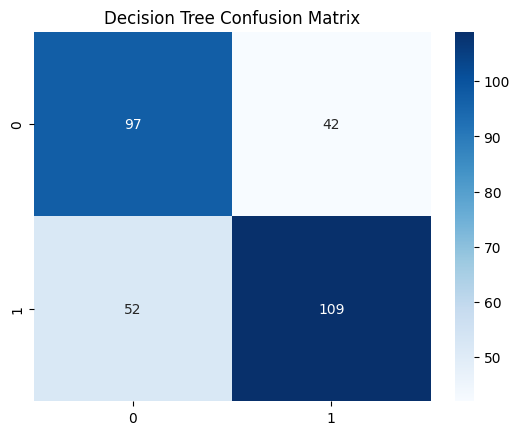

In [18]:
plt.figure()
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# SVM

In [19]:
svm_model = SVC(random_state=10)
svm_model.fit(x_train, y_train.ravel())
svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)
print("SVM Accuracy = {:.3f}".format(svm_accuracy))
print("SVM Confusion Matrix:")
print(svm_cm)

SVM Accuracy = 0.710
SVM Confusion Matrix:
[[109  30]
 [ 57 104]]


## Plot SVM Confusion Matrix

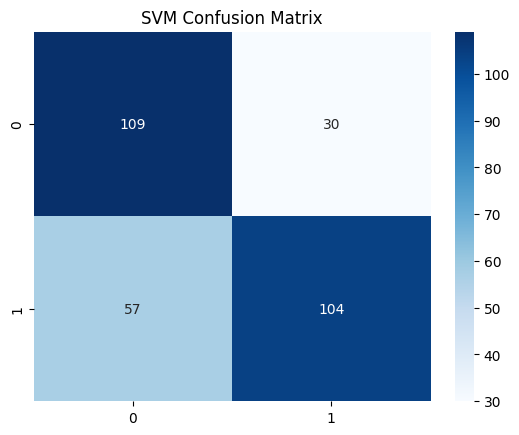

In [20]:
plt.figure()
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.title("SVM Confusion Matrix")
plt.show()

# Random Forest

In [41]:
random_forest_model = RandomForestClassifier(random_state=11)
random_forest_model.fit(x_train, y_train.ravel())
rf_predictions = random_forest_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Accuracy = {:.3f}".format(rf_accuracy))
print("Random Forest Confusion Matrix:")
print(rf_cm)

Random Forest Accuracy = 0.763
Random Forest Confusion Matrix:
[[109  30]
 [ 41 120]]


## Plot Random Forest Confusion Matrix

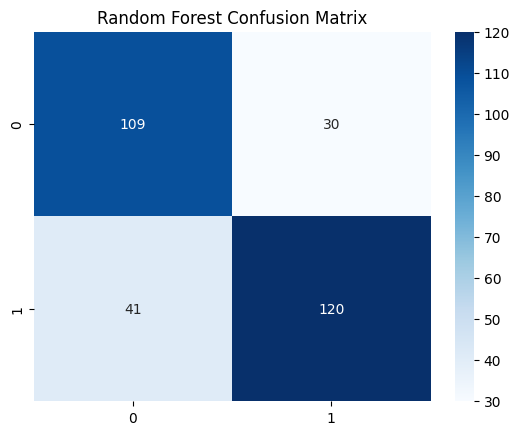

In [42]:
plt.figure()
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

# KNN

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)
print("KNN Accuracy = {:.3f}".format(knn_accuracy))
print("KNN Confusion Matrix:")
print(knn_cm)

KNN Accuracy = 0.700
KNN Confusion Matrix:
[[ 94  45]
 [ 45 116]]


## Plot KNN Confusion Matrix

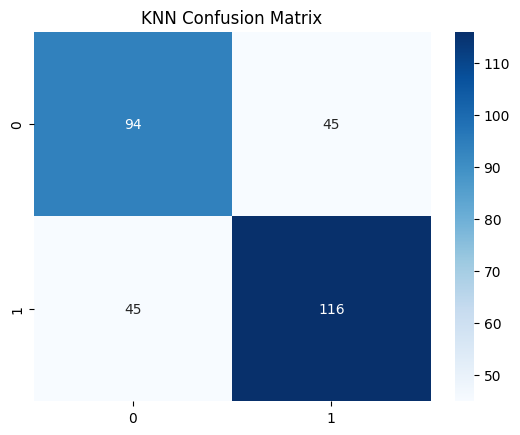

In [44]:
plt.figure()
sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt="d")
plt.title("KNN Confusion Matrix")
plt.show()

# Logistic Regression

In [45]:
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression_model.fit(x_train, y_train.ravel())
lr_accuracy = logistic_regression_model.score(x_train, y_train)
lr_cm = confusion_matrix(y_test, logistic_regression_model.predict(x_test))
print("Logistic Regression Accuracy = {:.3f}".format(lr_accuracy))
print("Logistic Regression Confusion Matrix:")
print(lr_cm)

Logistic Regression Accuracy = 0.746
Logistic Regression Confusion Matrix:
[[108  31]
 [ 52 109]]


# Plot Logistic Regression Confusion Matrix

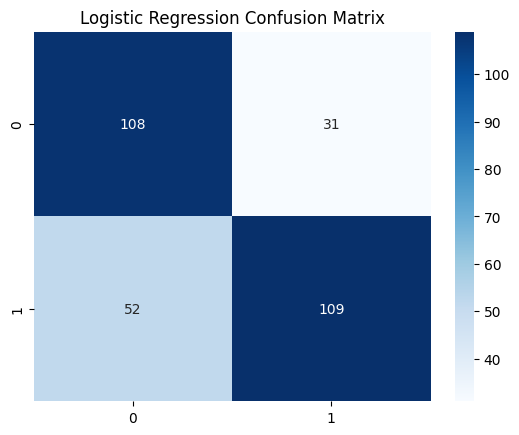

In [26]:
plt.figure()
sns.heatmap(lr_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plot Classifier Scores for Different Models

In [27]:
models = {
    'Decision Tree': dt_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'KNN': knn,
    'Logistic Regression': logistic_regression_model
}


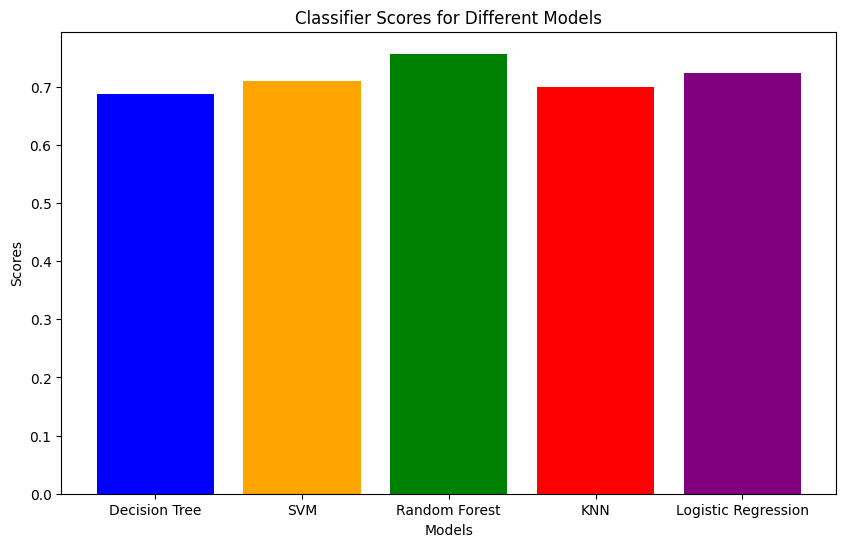

In [28]:
plt.figure(figsize=(10, 6))
scores = []
labels = []
for label, model in models.items():
    scores.append(model.score(x_test, y_test))
    labels.append(label)
plt.bar(labels, scores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Classifier Scores for Different Models')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def compare_models(models, x_test, y_test):
    metrics = ['Accuracy', 'Precision', 'Recall']
    results = {}
    
    for label, model in models.items():
        predictions = model.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        results[label] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        }
    
    df_results = pd.DataFrame(results)
    df_results.index = metrics
    
    return df_results

models = {
    'Decision Tree': dt_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'KNN': knn,
    'Logistic Regression': logistic_regression_model
}

comparison = compare_models(models, x_test, y_test)
print(comparison)


           Decision Tree       SVM  Random Forest       KNN  \
Accuracy        0.686667  0.710000       0.756667  0.700000   
Precision       0.721854  0.776119       0.801370  0.720497   
Recall          0.677019  0.645963       0.726708  0.720497   

           Logistic Regression  
Accuracy              0.723333  
Precision             0.778571  
Recall                0.677019  


# Save the best model (Random Forest)

In [30]:
import joblib
joblib.dump(random_forest_model, 'diabetesModel.joblib')

['diabetesModel.joblib']

### Load the saved model for future use

In [31]:
loaded_model = joblib.load('diabetesModel.joblib')